### Installing XGBoost

* Execute below command in terminal


* !pip install xgboost
   *   OR
* sudo conda install -c conda-forge xgboost (Run in terminal)

In [3]:
import pandas as pd
import numpy

from sklearn import preprocessing, metrics, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

#### Problem Statement - Tennis Australia is trying to better automate how tennis points get categorized into three outcomes – winners, forced errors and unforced errors.

#### Dataset Description:

The dataset includes point outcomes of rallies only (where the number of shots hit exceeds two, which represents the serve and return). All points were played at a past Australian Open.


In [4]:
data = pd.read_csv("./DataSet/train.csv")

In [5]:
data.shape

(8001, 27)

#### See the top 5 rows of the data

In [6]:
data.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,0.705435,12.5628,2.0724,True,F,0.445318,False,UE,mens,8644
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,3.856600,12.3544,5.1124,False,B,0.432434,False,FE,mens,1182
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,2.908892,13.8620,1.6564,False,F,0.397538,True,FE,mens,9042
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,0.557554,14.2596,0.1606,True,B,0.671984,True,UE,mens,1222
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,3.945317,11.3658,1.1082,False,F,0.340411,False,W,mens,4085


#### Different classes in Outcome variable

In [7]:
pd.unique(data.outcome)

array(['UE', 'FE', 'W'], dtype=object)

#### Outcome variable - classes
* Winner – the point winning player hits a shot that is not touched by the opponent
* Forced error – the point winning player hits a shot that causes the opponent to not be able to return it, i.e. a good shot that is hard to handle
* Unforced error – the player attempting to return the ball makes an error on an otherwise normal looking rally shot

#### Check the number of columns

In [8]:
len(data.columns)

27

#### Display data type of each variable

In [9]:
data.dtypes

rally                                   int64
serve                                   int64
hitpoint                               object
speed                                 float64
net.clearance                         float64
distance.from.sideline                float64
depth                                 float64
outside.sideline                         bool
outside.baseline                         bool
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                                bool
previous.hitpoint                 

#### Identifying categorical attributes

In [10]:
categorical_list = ["hitpoint","outside.sideline",
                    "outside.baseline","same.side","previous.hitpoint","server.is.impact.player","gender","outcome"]

#### Converting to appropriate datatype

In [11]:
for i in data[categorical_list]:
    data[i] = data[i].astype("category")    

#### Display data type of each variable after conversion

In [12]:
data.dtypes

rally                                    int64
serve                                    int64
hitpoint                              category
speed                                  float64
net.clearance                          float64
distance.from.sideline                 float64
depth                                  float64
outside.sideline                      category
outside.baseline                      category
player.distance.travelled              float64
player.impact.depth                    float64
player.impact.distance.from.center     float64
player.depth                           float64
player.distance.from.center            float64
previous.speed                         float64
previous.net.clearance                 float64
previous.distance.from.sideline        float64
previous.depth                         float64
opponent.depth                         float64
opponent.distance.from.center          float64
same.side                             category
previous.hitp

#### Dropping ID column and checking the length of columns

In [13]:
data.drop(["ID"], axis=1, inplace=True)
len(data.columns)

26

#### Display summary statistics 

In [14]:
data.describe()

,rally,serve,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,previous.time.to.net
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000
mean,5.966004,1.398700,30.806938,0.629658,1.467630,4.421146,2.690463,11.899694,1.919544,12.253954,1.213795,28.763676,0.821562,2.193420,4.218717,12.616810,2.367952,0.549988
std,3.548182,0.489661,7.298917,0.982504,1.108697,3.144965,1.713136,2.788231,1.205449,2.039085,0.964364,6.477470,0.674663,1.038942,2.052946,2.075401,1.313927,0.186788
min,3.000000,1.000000,5.176078,-0.998184,0.000497,0.003135,0.000000,2.156000,0.000200,1.389800,0.000400,8.449117,0.028865,0.000164,0.000467,2.161200,0.000200,0.003201
25%,3.000000,1.000000,26.770290,-0.027092,0.539500,1.641161,1.444233,11.221400,0.942400,11.374200,0.551800,24.033218,0.404815,1.354458,2.733674,12.082400,1.352200,0.432164
50%,5.000000,1.000000,32.417690,0.445870,1.210847,3.860266,2.360894,12.691800,1.829400,12.551600,0.983800,29.793417,0.658382,2.168822,4.126864,12.901600,2.332000,0.507559
75%,7.000000,2.000000,35.681431,0.970844,2.215955,7.029345,3.565853,13.553000,2.745200,13.498000,1.596600,33.581003,1.021397,3.022677,5.595515,13.712800,3.259000,0.624135
max,38.000000,2.000000,55.052795,12.815893,7.569757,11.886069,14.480546,18.125600,7.746200,18.745800,9.352600,54.207506,6.730275,4.114361,9.997963,20.211000,6.852600,1.635257


In [15]:
data.describe(include=['category'])

,hitpoint,outside.sideline,outside.baseline,same.side,previous.hitpoint,server.is.impact.player,outcome,gender
count,8001,8001,8001,8001,8001,8001,8001,8001
unique,4,2,2,2,4,2,3,2
top,F,False,False,False,F,True,UE,mens
freq,4402,6500,6380,6036,3684,4670,3501,4005


#### Checking for null values

In [16]:
data.isnull().sum()

rally                                 0
serve                                 0
hitpoint                              0
speed                                 0
net.clearance                         0
distance.from.sideline                0
depth                                 0
outside.sideline                      0
outside.baseline                      0
player.distance.travelled             0
player.impact.depth                   0
player.impact.distance.from.center    0
player.depth                          0
player.distance.from.center           0
previous.speed                        0
previous.net.clearance                0
previous.distance.from.sideline       0
previous.depth                        0
opponent.depth                        0
opponent.distance.from.center         0
same.side                             0
previous.hitpoint                     0
previous.time.to.net                  0
server.is.impact.player               0
outcome                               0


#### Display all the columns

In [17]:
data.columns

Index(['rally', 'serve', 'hitpoint', 'speed', 'net.clearance',
       'distance.from.sideline', 'depth', 'outside.sideline',
       'outside.baseline', 'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'same.side', 'previous.hitpoint', 'previous.time.to.net',
       'server.is.impact.player', 'outcome', 'gender'],
      dtype='object')

#### Creating a list of numerical attributes

In [18]:
numeric_list = ['rally','serve','speed','net.clearance','distance.from.sideline','depth','player.distance.travelled','player.impact.depth','player.impact.distance.from.center','player.depth','player.distance.from.center','previous.speed','previous.net.clearance','previous.distance.from.sideline','previous.depth','opponent.depth','opponent.distance.from.center','previous.time.to.net']
numeric_data = data[numeric_list]


#### Creating a list of categorical attributes

In [20]:
categorical_list = ["hitpoint","outside.sideline",
                    "outside.baseline","same.side","previous.hitpoint","server.is.impact.player","gender"]

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le1 = preprocessing.LabelEncoder()
for i in categorical_list:
    le1.fit(data[i])
    data[i] = le1.fit_transform(data[i])

In [22]:
data.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender
0,4,1,0,35.515042,-0.021725,3.474766,6.797621,0,0,1.467570,...,2.449182,0.705435,12.5628,2.0724,1,1,0.445318,0,UE,0
1,4,2,0,33.382640,1.114202,2.540801,2.608708,0,1,2.311931,...,0.583291,3.856600,12.3544,5.1124,0,0,0.432434,0,FE,0
2,23,1,0,22.316690,-0.254046,3.533166,9.435749,0,0,3.903728,...,1.115250,2.908892,13.8620,1.6564,0,1,0.397538,1,FE,0
3,9,1,1,36.837309,0.766694,0.586885,3.342180,1,0,0.583745,...,3.256695,0.557554,14.2596,0.1606,1,0,0.671984,1,UE,0
4,4,1,0,35.544208,0.116162,0.918725,5.499119,0,0,2.333456,...,1.431146,3.945317,11.3658,1.1082,0,1,0.340411,0,W,0


In [23]:
# Divide into train and test
y=data["outcome"]
X=data.drop('outcome', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 25)
(1601, 25)
(6400,)
(1601,)


In [24]:
y_train.value_counts()

UE    2825
W     2138
FE    1437
Name: outcome, dtype: int64

#### Building Decision Tree

In [25]:
estimator = DecisionTreeClassifier(max_depth=4,random_state=123)
estimator.fit(X_train, y_train)

y1_pred_ = estimator.predict(X_train)
y_pred_ = estimator.predict(X_test)

print(accuracy_score(y_train,y1_pred_))
print(classification_report(y_train,y1_pred_,digits=4))
print("\n")

print(accuracy_score(y_test,y_pred_))
print(classification_report(y_test,y_pred_,digits=4))

0.77828125
             precision    recall  f1-score   support

         FE     0.7315    0.5651    0.6376      1437
         UE     0.7339    0.8630    0.7932      2825
          W     0.8796    0.8096    0.8432      2138

avg / total     0.7820    0.7783    0.7750      6400



0.7620237351655216
             precision    recall  f1-score   support

         FE     0.6719    0.5591    0.6103       381
         UE     0.7220    0.8491    0.7804       676
          W     0.8855    0.7960    0.8383       544

avg / total     0.7656    0.7620    0.7596      1601



In [26]:
print(confusion_matrix(y_test, y_pred_))

[[213 133  35]
 [ 81 574  21]
 [ 23  88 433]]


In [27]:
def plot_tree(tree,dataframe,label_col,plot_title):
    label_names=pd.unique(dataframe[label_col])
   
    # Obtaining plot data
    graph_data=export_graphviz(tree,feature_names=dataframe.drop(label_col,axis=1).columns,
                               class_names=label_names,filled=True,rounded=True,out_file=None)

    # Generating plot
    graph=graphviz.Source(graph_data)
    graph.render(plot_title)
    
    ## Write image to pdf
    return graph

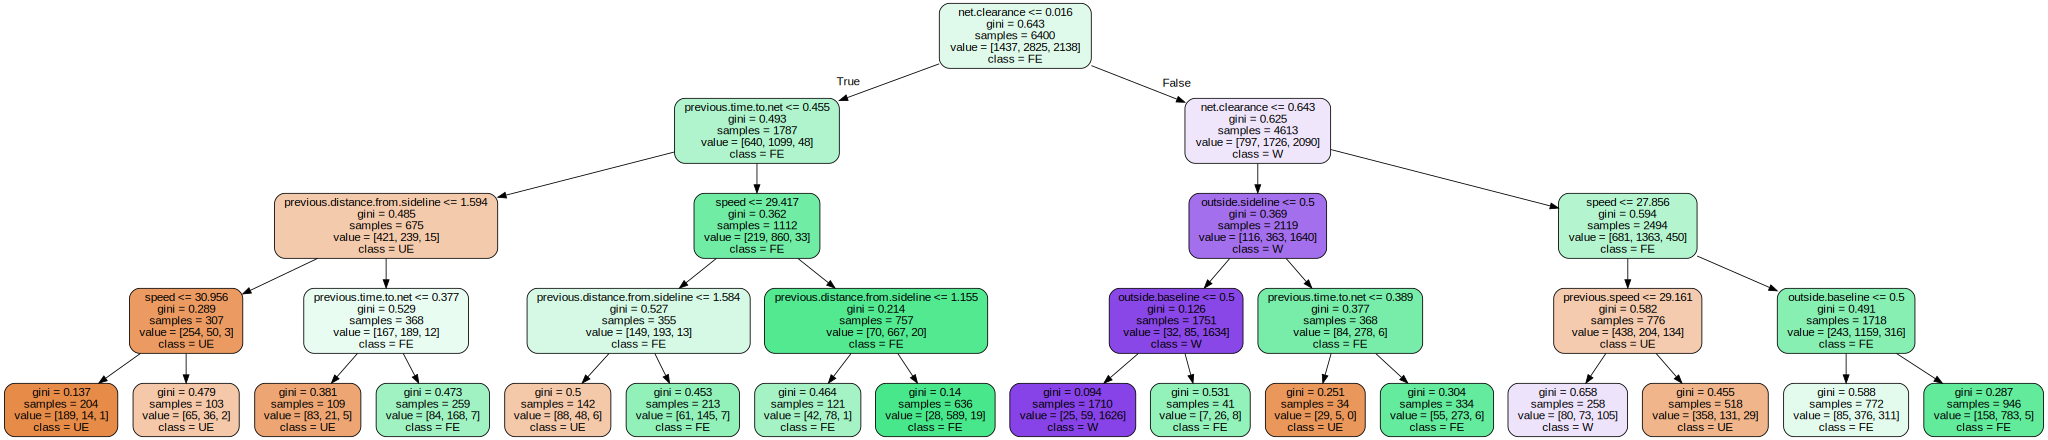

In [28]:
tree_graph=plot_tree(estimator,data,'outcome','tennis')
tree_graph

#### With Standardization

In [29]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [30]:
X_train.dtypes

rally                                   int64
serve                                   int64
hitpoint                                int64
speed                                 float64
net.clearance                         float64
distance.from.sideline                float64
depth                                 float64
outside.sideline                        int64
outside.baseline                        int64
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                               int64
previous.hitpoint                 

In [31]:
continuous_cols=['rally','serve','speed','net.clearance','distance.from.sideline','depth','player.distance.travelled','player.impact.depth','player.impact.distance.from.center','player.depth','player.distance.from.center','previous.speed','previous.net.clearance','previous.distance.from.sideline','previous.depth','opponent.depth','opponent.distance.from.center','previous.time.to.net']
categorical_cols=["hitpoint","outside.sideline",
                    "outside.baseline","same.side","previous.hitpoint","server.is.impact.player","gender"]

In [32]:
mapper=[]

mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in continuous_cols] +
  [([categorical_col], OneHotEncoder()) for categorical_col in categorical_cols]
)

In [33]:
print(type(mapper))

<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>


In [34]:
mapper.fit(X_train)

X_train_std = mapper.transform(X_train)
X_test_std = mapper.transform(X_test)

In [35]:
X_train_std[0:1,]

array([[-0.83091618, -0.81995621,  1.21102258,  0.08020881, -0.87176578,
        -0.98008363, -1.14910864, -0.15561033, -0.67143058, -0.65741039,
        -0.59054223, -0.37550175,  0.76969783,  1.77383589, -0.14587934,
         1.14045914, -0.05153211,  0.70279019,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ]])

In [36]:
X_test_std[0:1,]

array([[ 0.57801333, -0.81995621, -2.85663436, -1.48289434,  1.60918994,
         2.30272382,  0.12674997, -2.0329614 , -0.69909932, -1.65119689,
        -1.13488584,  0.05328774, -0.75870086, -0.00931136,  0.83165742,
         0.80462199,  0.42911601,  0.09046058,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ]])

In [76]:
estimator1 = DecisionTreeClassifier(max_depth=4,random_state=123)
estimator1.fit(X_train_std, y_train)

y1_pred_ = estimator1.predict(X_train_std)
y_pred_ = estimator1.predict(X_test_std)

print(accuracy_score(y_train,y1_pred_))
print(classification_report(y_train,y1_pred_,digits=4))
print("\n")

print(accuracy_score(y_test,y_pred_))
print(classification_report(y_test,y_pred_,digits=4))


0.77828125
             precision    recall  f1-score   support

         FE     0.7315    0.5651    0.6376      1437
         UE     0.7339    0.8630    0.7932      2825
          W     0.8796    0.8096    0.8432      2138

avg / total     0.7820    0.7783    0.7750      6400



0.7620237351655216
             precision    recall  f1-score   support

         FE     0.6719    0.5591    0.6103       381
         UE     0.7220    0.8491    0.7804       676
          W     0.8855    0.7960    0.8383       544

avg / total     0.7656    0.7620    0.7596      1601



In [38]:
print(confusion_matrix(y_test, y_pred_))

[[213 133  35]
 [ 81 574  21]
 [ 23  88 433]]


## Random Forests

- Very simple yet very powerful machine learning algorithm
- As the name suggests: Builds a lot of trees within
- More robust for the obvious reasons
- We have a lot trees, thus lot pf predictions for the test class which enters, now the concept of majority voting.
- Can handle both classification and regression problems
- Extremely good to avoid overfitting

# Working

- Assume number of observations in training set is N. Then, sample of these N observations is taken at random but with replacement
- If the number of variables or features "m" we take square root of m features for node selection at each stage.
- There is no pruning done, trees are grown to the fullest depth
- New data is predicted by the majority voting method or averaging for regression problems

### Important Terminology
- Bagging or bootstrap aggregation
 - Randomly pick the dataset or sub sample the dataset but with replacement
 - Important point to remember, the size of the new dataset is same as the original dataset.

In [39]:
clf = RandomForestClassifier(n_estimators=100,random_state=1234)

clf.fit(X=X_train, y=y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

0.8619612742036228
             precision    recall  f1-score   support

         FE     0.7735    0.6903    0.7295       381
         UE     0.8387    0.8920    0.8645       676
          W     0.9483    0.9449    0.9466       544

avg / total     0.8604    0.8620    0.8603      1601



In [40]:
print(confusion_matrix(y_test, y_pred))

[[263 101  17]
 [ 62 603  11]
 [ 15  15 514]]


#### With Standardization

In [41]:
clf_1 = RandomForestClassifier(n_estimators=100,random_state=1234)

clf_1.fit(X=X_train_std, y=y_train)

# y1_pred_ = clf_1.predict(X_train_std)
# print(accuracy_score(y_train,y1_pred_))
# print(classification_report(y_train,y1_pred_,digits=4))

print("\n")

y_pred = clf_1.predict(X_test_std)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))



0.8657089319175515
             precision    recall  f1-score   support

         FE     0.7887    0.6955    0.7392       381
         UE     0.8477    0.8891    0.8679       676
          W     0.9353    0.9559    0.9455       544

avg / total     0.8634    0.8657    0.8636      1601



In [42]:
print(confusion_matrix(y_test, y_pred))

[[265  96  20]
 [ 59 601  16]
 [ 12  12 520]]


#### Random Forest Parameters
* n_estimators is the number of trees in the forest
* max_depth is how deep each tree can be
* min_sample_leaf is the minimum samples required in each leaf node for the root node to split.
    "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf".


In [43]:
## Use Grid Search for parameter tuning. (Exhaustive search over specified parameter values for an estimator)

from sklearn.model_selection import GridSearchCV

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree

rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt')
 
# Use a grid over parameters of interest

param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [5, 10],
           "min_samples_leaf" : [2, 4]}
 
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 10)

##### GridSearchCV implements a “fit” and a “score” method. 

In [44]:
## Fit the grid search model
rfc_cv_grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [9, 18, 27, 36, 45, 54, 63], 'max_depth': [5, 10], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

0.86671875 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 45}


In [46]:
clf.feature_importances_

array([0.01103066, 0.00335083, 0.00725348, 0.07150816, 0.16517427,
       0.04444378, 0.06219542, 0.09812921, 0.06750106, 0.0353156 ,
       0.05512107, 0.02184904, 0.02789639, 0.02003796, 0.04948839,
       0.02711221, 0.04878835, 0.02967193, 0.04093694, 0.02180922,
       0.00224531, 0.00805094, 0.07542756, 0.00254445, 0.00311778])

In [47]:
X_train.columns

Index(['rally', 'serve', 'hitpoint', 'speed', 'net.clearance',
       'distance.from.sideline', 'depth', 'outside.sideline',
       'outside.baseline', 'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'same.side', 'previous.hitpoint', 'previous.time.to.net',
       'server.is.impact.player', 'gender'],
      dtype='object')

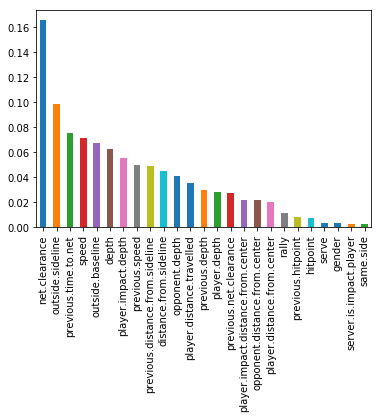

In [48]:
feat_importances_rf = pd.Series(clf.feature_importances_, index = X_train.columns)
feat_importances_ordered = feat_importances_rf.nlargest(n=len(feat_importances_rf))
feat_importances_ordered.plot(kind='bar')

## Model Building

### Build ADABOOST Classifier

1. Assign every observation, X(i), with an initial weight value, w(i) = 1/n, 
Where n is the total number of observations.
2. Train a **weak** model.
3. For each observation:
 <br>3.1. If predicted **incorrectly**, w(i) is **increased**.
 <br>3.2. If predicted **correctly**, w(i) i **decreased**.
4. Train a new weak model where observations with greater weights are given more priority.
5. Repeat steps 3 and 4 until observatons are perfectly predicted or a preset number of trees are trained. 

#### Create Adaboost Classifier

The most important parameters are base_estimator, n_estimators, and learning_rate.
-  **base_estimator** is the learning algorithm to use to train the weak models. This will almost always not needed to be changed because by far the most common learner to use with AdaBoost is a decision tree – this parameter’s default argument.
-  **n_estimators** is the number of models to iteratively train.
-  **learning_rate** is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model train slower (but sometimes resulting in better performance scores).
-  **loss** is exclusive to AdaBoostRegressor and sets the loss function to use when updating weights. This defaults to a linear loss function however can be changed to square or exponential.

In [49]:
# Create adaboost-decision tree classifer object
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1)

In [50]:
%time Adaboost_model.fit(X_train, y_train)

CPU times: user 20.5 s, sys: 88 ms, total: 20.6 s
Wall time: 21.7 s


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=600, random_state=None)

In [51]:
y_preds = Adaboost_model.predict(X_test)

In [52]:
print(accuracy_score(y_test, y_preds))

0.8288569643972518


In [53]:
param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [54]:
%time Adaboost_model_clf.fit(X_train, y_train)

CPU times: user 6.69 s, sys: 119 ms, total: 6.81 s
Wall time: 2min 11s


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
best_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_) 

0.85375 {'learning_rate': 0.1, 'n_estimators': 200}


In [56]:
y_pred_test = best_ada_model.predict(X_test)

In [57]:
print(accuracy_score(y_test,y_pred_test))

0.8488444722048719


In [58]:
print(confusion_matrix(y_test, y_pred_test))

[[235 128  18]
 [ 53 608  15]
 [ 17  11 516]]


## Build Gradient Boosting Classifier

Gradient boosting is a type of boosting. 

The key idea behind gradient boosting is to set the target outcomes for this next model in order to minimize the error. The target outcome for each case in the data set depends on how much a change in that case’s prediction impacts the overall prediction error.

If, for case X(i), a small change in the prediction causes a large drop in error, then the next target outcome is a high value. Predictions from the new model that are close to its targets will reduce the error.

If, for case X(j), a small change in the prediction causes no change in error, then the next target outcome is zero because changing this prediction does not decrease the error.

The name gradient boosting arises because of setting target outcomes based on the gradient of the error with respect to the prediction of each case. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

1. Initialize the outcome
2. Iterate from 1 to total number of trees
  <br>2.1 Update the weights for targets based on previous run (higher for the ones mis-classified)
  <br>2.2 Fit the model on selected subsample of data
  <br>2.3 Make predictions on the full set of observations
  <br>2.4 Update the output with current results taking into account the learning rate
3. Return the final output.

The most important parameters are learning_rate, n_estimators and subsample
- **learning_rate**
    -  This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
    -  Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
    -  Lower values would require higher number of trees to model all the relations and will be computationally expensive.
- **n_estimators**
    -  The number of sequential trees to be modeled (step 2)
    -  Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
- **subsample**
    -  The fraction of observations to be selected for each tree. Selection is done by random sampling.
    -  Values slightly less than 1 make the model robust by reducing the variance.
    -  Typical values ~0.8 generally work fine but can be fine-tuned further.

In [59]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [60]:
%time GBM_model.fit(X=X_train, y=y_train)

CPU times: user 2.05 s, sys: 24.3 ms, total: 2.07 s
Wall time: 2.12 s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

In [61]:
y_pred = GBM_model.predict(X_test)

In [62]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

0.8607120549656465
             precision    recall  f1-score   support

         FE     0.7672    0.6745    0.7179       381
         UE     0.8425    0.8861    0.8637       676
          W     0.9405    0.9596    0.9500       544

avg / total     0.8579    0.8607    0.8583      1601



In [63]:
from sklearn.model_selection import GridSearchCV

# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.2]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 5)

In [64]:
%time CV_GBM.fit(X=X_train, y=y_train)

CPU times: user 9min 20s, sys: 2.92 s, total: 9min 23s
Wall time: 42min 53s


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
# Find best model
best_gbm_model = CV_GBM.best_estimator_
print (CV_GBM.best_score_, CV_GBM.best_params_)

0.87578125 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}


In [66]:
y_pred_test=best_gbm_model.predict(X_test)

In [67]:
print(accuracy_score(y_test,y_pred_test))

0.8557151780137414


In [68]:
print(confusion_matrix(y_test, y_pred_test))

[[260 102  19]
 [ 66 593  17]
 [ 14  13 517]]


### Build XGBOOST Classifier
XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm.
#### The XGBoost Advantages
-  Regularization:
    -  Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
    -  In fact, XGBoost is also known as ‘regularized boosting‘ technique.
-  Parallel Processing:
    -  XGBoost implements parallel processing and is blazingly faster as compared to GBM.
    -  Boosting is sequential process that each tree can be built only after the previous one, and it  can be parallelized with making a tree using all cores. Refer. http://zhanpengfang.github.io/418home.html
    
    -  XGBoost also supports implementation on Hadoop.
-  High Flexibility
    -  XGBoost allow users to define custom optimization objectives and evaluation criteria.
    -  This adds a whole new dimension to the model and there is no limit to what we can do.
-  Handling Missing Values
    -  XGBoost has an in-built routine to handle missing values.
    -  User is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.
-  Tree Pruning:
    -  A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
    -  XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
    -  Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.
-  Built-in Cross-Validation
    -  XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
    -  This is unlike GBM where we have to run a grid-search and only a limited values can be tested.
-  Continue on Existing Model
    -  User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
    -  GBM implementation of sklearn also has this feature so they are even on this point.

#### Create XGBoost Classifier

There are different hyperparameters that we can tune and the parametres are different from baselearner to baselearner. 
<br>In tree based learners, which are the most common ones in xgboost applications, the following are the most commonly tuned hyperparameters:

-  **learning rate/eta:** governs how quickly the model fits the residual error using additional base learners. If it is a smaller learning rate, it will need more boosting rounds, hence more time, to achieve the same reduction in residual error as one with larger learning rate. Typically, it lies between 0.01 – 0.3
-  **max_depth:** max depth per tree. This controls how deep our tree can grow. The Larger the depth, more complex the model will be and higher chances of overfitting. Larger data sets require deep trees to learn the rules from data. Default = 6.
-  **subsample:** % samples used per tree. This is the fraction of the total training set that can be used in any boosting round. Low value may lead to underfitting issues. A very high value can cause over-fitting problems.
-  **colsample_bytree:** % features used per tree. This is the fraction of the number of columns that we can use in any boosting round. A smaller value is an additional regularization and a larger value may be cause overfitting issues.
-  **n_estimators:** number of estimators (base learners). This is the number of boosting rounds.
<br><br>The three hyperparameters below are regularization hyperparameters.
-  **gamma:** min loss reduction to create new tree split. default = 0 means no regularization.
-  **lambda:** L2 reg on leaf weights. Equivalent to Ridge regression.
-  **alpha:** L1 reg on leaf weights. Equivalent to Lasso regression.


Refer: https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [69]:
XGB_model = XGBClassifier(n_estimators=500, gamma=0.5,learning_rate=0.1)
%time XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

CPU times: user 23.3 s, sys: 117 ms, total: 23.4 s
Wall time: 23.7 s
0.8638351030605871


In [70]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 2),
     'n_estimators':[100],
     'max_depth': [10, 15]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

In [71]:
%time CV_XGB.fit(X = X_train, y=y_train)

CPU times: user 7min 27s, sys: 2.83 s, total: 7min 29s
Wall time: 8min 26s


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'colsample_bytree': array([0.5, 0.9]), 'n_estimators': [100], 'max_depth': [10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
# Find best model
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)

0.8759375 {'colsample_bytree': 0.9, 'max_depth': 15, 'n_estimators': 100}


In [73]:
y_pred_test=best_xgb_model.predict(X_test)

In [74]:
print(accuracy_score(y_test,y_pred_test))

0.863210493441599


In [75]:
print(confusion_matrix(y_test, y_pred_test))

[[262 101  18]
 [ 61 600  15]
 [ 13  11 520]]
